In [1]:
# Do not delete this cell. It ensures that you can do the imports,
# load datasets etc. in the same fashion as in any Python script
# in the project template.


import sys
sys.path.insert(0, '../..')
from bld.project_paths import project_paths_join as ppj
from bld.project_paths import project_paths as pp



In [2]:
from qpricesim.simulations.agents_simulation import train_agents

In [3]:
import pickle
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
rounds_to_plot = 20

In [5]:
with open(ppj("OUT_ANALYSIS", f"array_all_state_simulations_2_agents.pickle"), "rb") as f:
    all_play_sims = pickle.load(f)

In [6]:
# MC runs, States, Simulation periods, prices in state
all_play_sims.shape

(1000, 36, 100, 2)

In [7]:
agg_mean_states_of_interest = all_play_sims.mean(axis=0)[:,:rounds_to_plot,:]

In [8]:
agg_std_states_of_interest = all_play_sims.std(axis=0)[:,:rounds_to_plot,:]

In [9]:
def normalize_x_to_a_b(x, a, b, mini, maxi):
    return (b - a) * ((x - mini) / (maxi - mini)) + a

In [10]:
agg_std_states_of_interest_normalized = normalize_x_to_a_b(agg_std_states_of_interest, 5, 20, np.min(agg_std_states_of_interest), np.max(agg_std_states_of_interest))

In [11]:
agg_std_states_of_interest_normalized_mean = agg_std_states_of_interest_normalized.mean(axis=2)

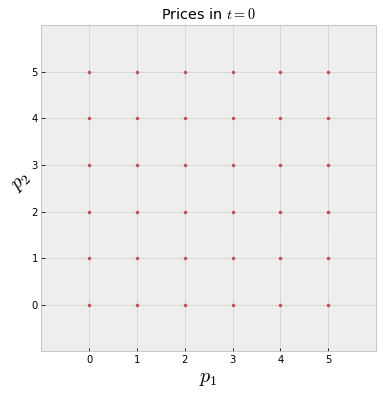

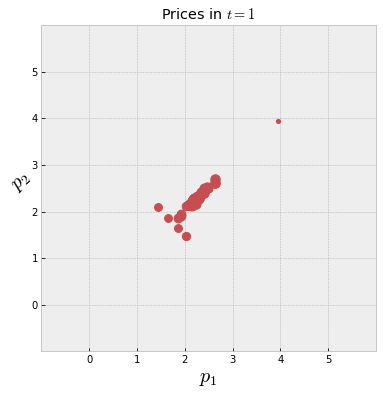

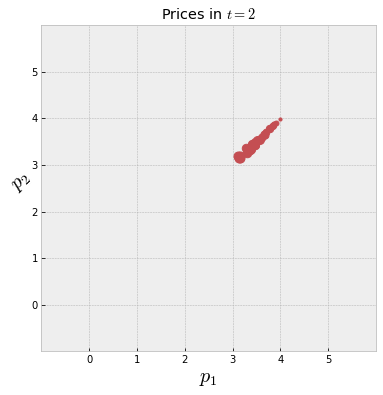

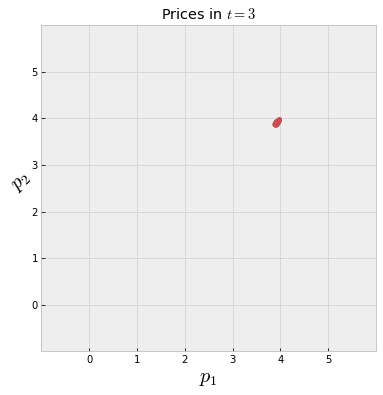

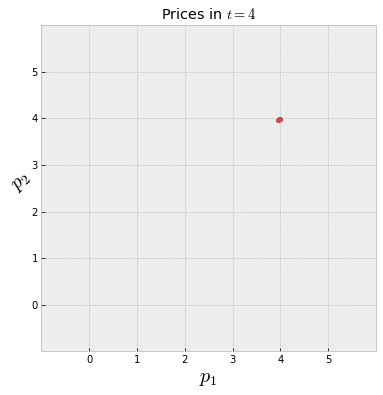

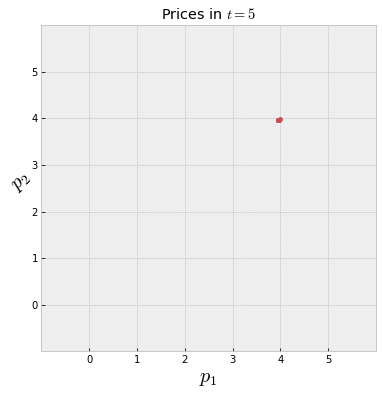

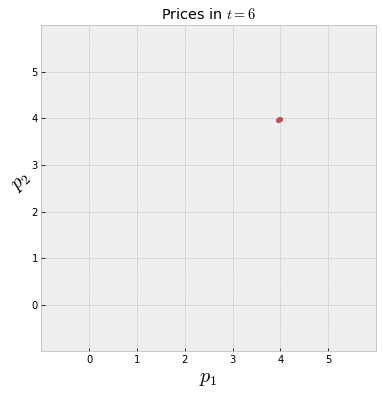

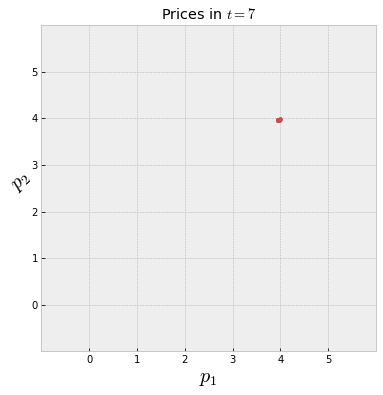

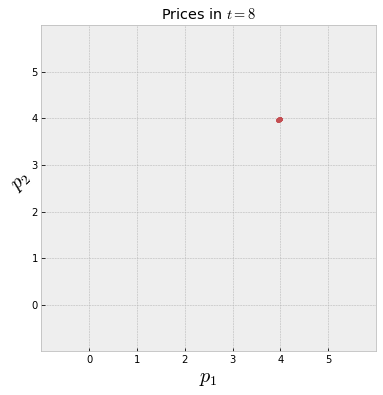

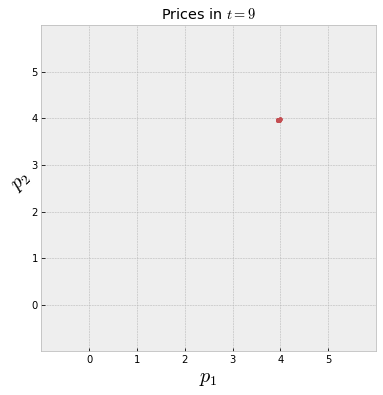

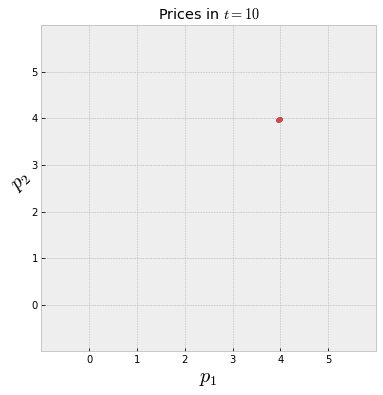

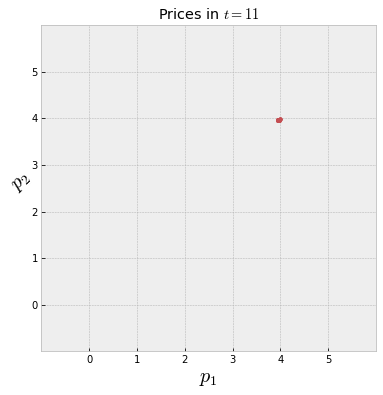

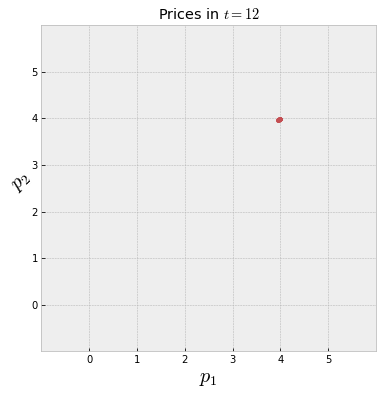

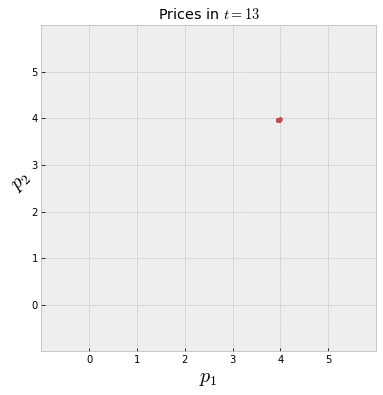

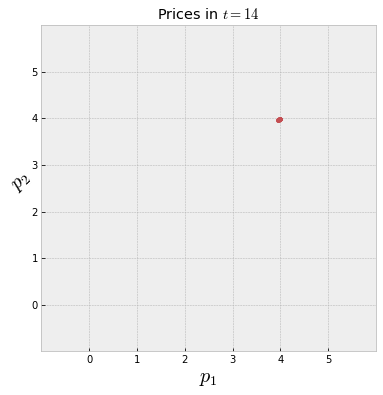

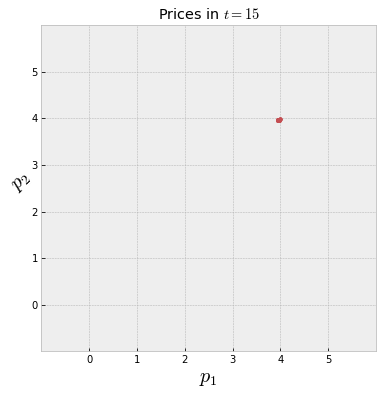

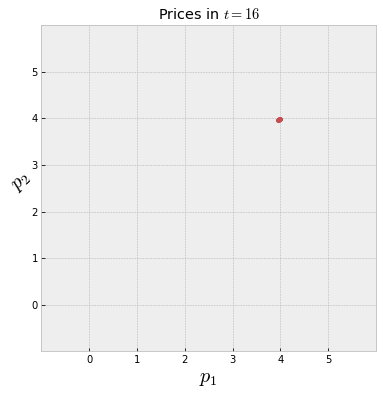

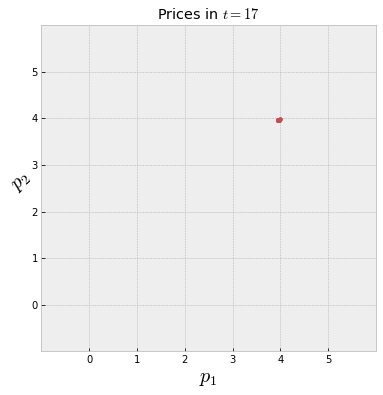

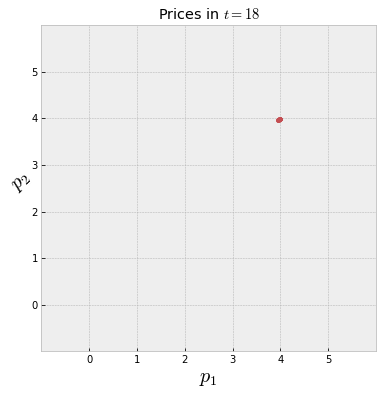

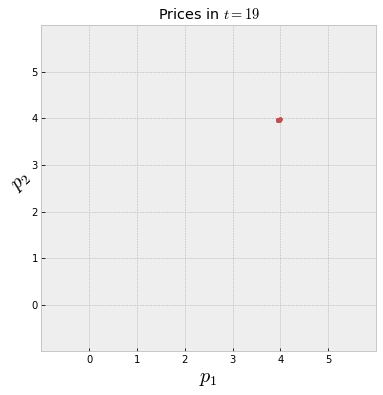

In [12]:
all_inital_states = agg_mean_states_of_interest.shape[0]
continuation_state = 1
plt.style.use('bmh')

for continuation_state in range(rounds_to_plot):
    plt.figure(figsize=[6,6])
    plt.ylim([-1,6])
    plt.xlim([-1,6])
    plt.xticks([0,1,2,3,4,5])
    plt.yticks([0,1,2,3,4,5])
    plt.ylabel("$p_2$",rotation=45, fontsize=20)
    plt.xlabel("$p_1$",rotation=0, fontsize=20)
    plt.title(f"Prices in $t={continuation_state}$")
    for index_s in range(all_inital_states):
        plt.plot(agg_mean_states_of_interest[index_s,continuation_state,:][0],
                 agg_mean_states_of_interest[index_s,continuation_state,:][1],
                 '.',
                 markersize=agg_std_states_of_interest_normalized_mean[index_s, continuation_state],
                 color=sns.color_palette('deep')[3])
    
    plt.savefig(ppj("OUT_FIGURES", f"transition-{continuation_state}.pdf"),  bbox_inches='tight')